# 1.1.1 (Вариант 2)

In [7]:
def qZ(x,y):
    return (x-3*y-3)/(x**2+2*y**2+1)

def qSumZ(z):
    return sum(z)

def exchangeScheme(oldX,oldY,sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    
    Y[2] = oldY[sortedId[0]]
    
    Y[3] = oldY[sortedId[1]]
    
    return X,Y

def sorting(Z):
    sortedId = sorted(range(len(Z)),key = lambda k:Z[k])
    return sortedId

def evoStep(X,Y,Z):
    _,minId = min((value,id) for (id,value) in enumerate(Z))
    X=X[:]
    Y=Y[:]
    Z=Z[:]
    
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X,Y,Z

def evoSteps(X,Y,stepsNum=4):
    results=[]
    
    for i in range(4):
        arrZ = [qZ(x,Y[i]) for i,x in enumerate(X)]
        
        X,Y,Z = evoStep(X,Y,arrZ)
        X,Y = exchangeScheme(X,Y,sorting(Z))
        results.append([X,Y,qSumZ(arrZ),arrZ])
    return X,Y,results


X = [-5,-3,-2,-1]
Y = [-1,-2,0,1]

results = evoSteps(X,Y)
qualityArrZ=[]

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    print(f'max_{i+1}_step:\t{results[2][i][2]}')
    
print(f'max Z:\t\t{max(qualityArrZ)}')

max_1_step:	-2.928571428571429
max_2_step:	-0.8319004524886877
max_3_step:	-0.2676147382029735
max_4_step:	0.09502262443438915
max Z:		0.07692307692307693


In [8]:
results

([-3, -2, -2, -2],
 [-2, -2, -2, -2],
 [[[-2, -5, -3, -3],
   [-2, -2, 0, -1],
   -2.928571428571429,
   [-0.17857142857142858, 0.0, -1.0, -1.75]],
  [[-3, -5, -2, -2],
   [-2, -2, -1, -2],
   -0.8319004524886877,
   [0.07692307692307693, -0.058823529411764705, -0.6, -0.25]],
  [[-5, -3, -2, -2],
   [-2, -2, -2, -2],
   -0.2676147382029735,
   [0.0, -0.058823529411764705, -0.2857142857142857, 0.07692307692307693]],
  [[-3, -2, -2, -2],
   [-2, -2, -2, -2],
   0.09502262443438915,
   [-0.058823529411764705, 0.0, 0.07692307692307693, 0.07692307692307693]]])

# 1.2.1 (Вариант 2)

In [46]:
import piplite as pl
await pl.install('scipy')
import networkx as nx
from math import e

distances = [(1,2,17),
            (1,3,39),
            (1,4,32),
            (1,5,28),
            (1,6,18),
            (2,3,24),
            (2,4,28),
            (2,5,35),
            (2,6,13),
            (3,4,25),
            (3,5,43),
            (3,6,23),
            (4,5,20),
            (4,6,16),
            (5,6,24)]

V = [1,3,5,4,6,2,1]
Z=[(3,4),
  (4,6),
  (5,6),
  (2,4)]
P=[41,60,85,60]
T=100

def probability(delta,T):
    return 100*e**(-delta/T)

def reductTemp(prevT):
    nexT = 0.5*prevT
    return nexT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)

Ответ: длина = 145


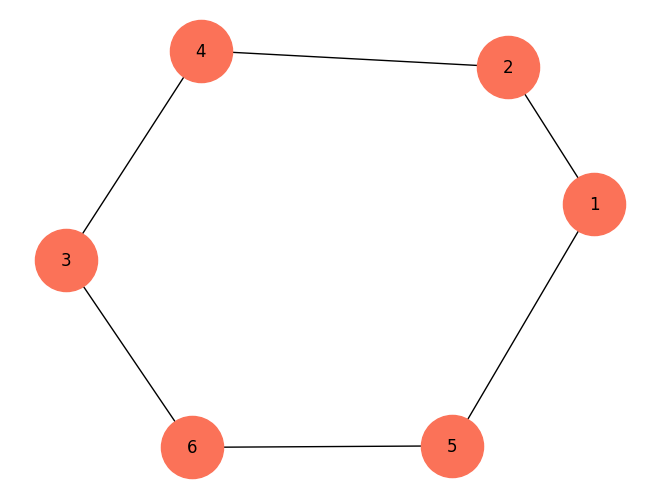

In [48]:
def edgeLength(i,j,distances,roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0]==i and item[1]==j) or (item[1]==i and item[0]==j) else -1)
                   for item in distances])
    else:
        return max([(item[2] if (item[0]==i and item[1]==j) else -1) for item in distances])
    
def routeLength(V,distances):
    edges=[]
    
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i],V[i+1],distances))
    return sum(edges)

def routeOneReplacement(arrV,Z,replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0]-decrement],arrV[Z[1]-decrement] = arrV[Z[1]-decrement],arrV[Z[0]-decrement]
    return arrV

def routeReplacement(V,Z):
    for z in Z:
        V = routeOneReplacement(V,z)
    return V

def chooseRoute(distances,V,Z,T,P):
    sumLength=routeLength(V,distances)
    arrSum=[sumLength]
    
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:],Z[i])
        newS = routeLength(newV,distances)
        arrSum.append(newS)
        deltaS = newS-sumLength
        
        if deltaS>0:
            p = probability(deltaS,T)
            if p > P[i]:
                V = newV
                sumLength=newS
        else:
            V=newV
            sumLength=newS
        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances,bestRoute):
    newDistances = []
    
    for i in range(len(bestRoute)-1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1] \
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)
    
bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print('Ответ: длина =',routeLength(bestRoute,distances))

drawRouteGraph(distances,bestRoute)